In [38]:
import ehrapy as ep
import pandas as pd
import numpy as np
import anndata as ad
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("data_task1.csv")

In [40]:
ordinal_columns = [
    "pT_status", "pN_status", "G_status", "L_status", "V_status", "Pn_status", "R_status", "M_status_postop"
]
nominal_columns = [
    "Status_OS", "PFS_sum", "Status_PFS", "sex", "Weight_loss_>10%_6months_before_OP", "DM",
    "Long_term_steroid_medication","C2_abusus", "CEA (ng/ml)","Localisation", "Abdominal pain", 
    "icterus", "new_onset_DM", "Episode_acute_pancreatitis", "Episode_chronic_pancreatitis", 
    "OP_technique", "Vessel_resection", "Resection_liver_met_intraop", "histology",
    "Clavien-Dindo",  "ICD-10 Diagnosis",
]   
numerical_columns = [
    "ID_scRNAseq", "NIssc", "OS", "PFS", "Liver_met_sum", "Lung_met_sum", "other_met_sum", "local_rec_sum", 
    "age_at_diagnosis", "Size_cm", "Weight_kg", "BMI", "ASA", "Serumalbumin (g/dl)", "Serum-CRP (mg/l)", 
    "Leucocytes (n*1000/?l)", "Hb (g/dl)", "Creatinine (mg/dl)", "Smoker_py", "Bilirubin (mg/dl)", 
    "Gamma-GT", "AP (U/l)", "Amylase (U/l)", "Lipase (U/l)","CA 19-9 (U/ml)",  
    "Number_resected_lymphnodes","Number_tumor_infiltrated_lymphnodes", "Ratio_tumorLN/resectedLN", "Tumorsize_mm"   
]

In [41]:
df[ordinal_columns] = df[ordinal_columns].astype("category")
print("Ordinal columns converted to categorical.")

Ordinal columns converted to categorical.


In [42]:
df_nominal = pd.get_dummies(df[nominal_columns], drop_first=True)
print("Nominal columns one-hot encoded.") 

Nominal columns one-hot encoded.


In [43]:
df_numerical = df[numerical_columns].values

In [44]:
obs_data = pd.concat([df[ordinal_columns], df_nominal], axis=1)

In [45]:
X_data = df_numerical

In [46]:
adata = ad.AnnData(X=X_data, obs=obs_data)

print("AnnData object created successfully.")

AnnData object created successfully.


In [47]:
adata.write("processed.h5ad")
print("AnnData object saved as 'processed.h5ad'.")

AnnData object saved as 'processed.h5ad'.


In [48]:
adata_loaded = ad.read("processed.h5ad")
print("AnnData object loaded.")

AnnData object loaded.


[Text(0.5, 1.0, 'pct of missing values: var')]

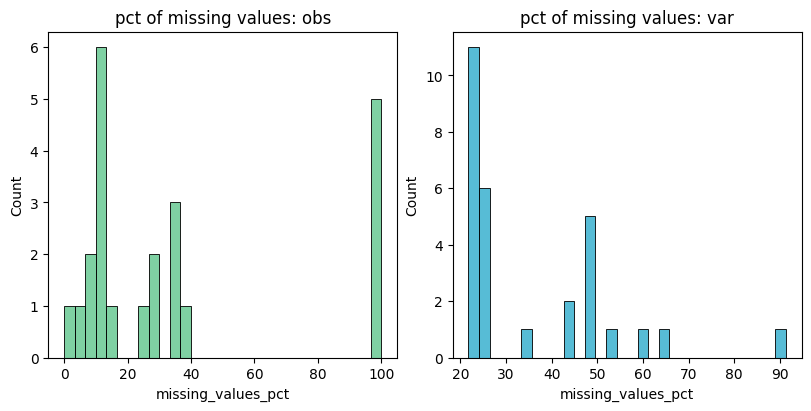

In [59]:
axd = plt.figure(constrained_layout=True, figsize=(8, 4), dpi=100).subplot_mosaic(
    """
    AB
    """
)

sns.histplot(
    adata.obs["missing_values_pct"], ax=axd["A"], bins=30, color="#54C285"
).set(title="pct of missing values: obs")
sns.histplot(
    adata.var["missing_values_pct"], ax=axd["B"], bins=30, color="#1FA6C9"
).set(title="pct of missing values: var")

In [61]:
adata.var.loc[
    adata.var["missing_values_pct"] == adata.var["missing_values_pct"].max(), :
]

,missing_values_abs,missing_values_pct,mean,median,standard_deviation,min,max,iqr_outliers,feature_type
22,21,91.304348,29.0,29.0,0.0,29.0,29.0,False,numeric


In [62]:
df = adata.to_df()

In [63]:
missing_percentage = df.isnull().mean() * 100

In [64]:
threshold = 30

In [65]:
features_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()

print(f"Features to drop (more than {threshold}% missing values): {features_to_drop}")

Features to drop (more than 30% missing values): ['2', '3', '4', '5', '6', '7', '13', '14', '18', '22', '23', '24']


In [66]:
adata = adata[:, ~adata.var_names.isin(features_to_drop)].copy()

In [67]:
print(f"Remaining features: {adata.var_names.tolist()}")

Remaining features: ['0', '1', '8', '9', '10', '11', '12', '15', '16', '17', '19', '20', '21', '25', '26', '27', '28']


In [68]:
ep.pp.knn_impute(adata, n_neighbours=5)

Output()

In [69]:
ep.pp.qc_metrics(adata)

(    missing_values_abs  missing_values_pct
 0                    0                 0.0
 1                    0                 0.0
 2                    0                 0.0
 3                    0                 0.0
 4                    0                 0.0
 5                    0                 0.0
 6                    0                 0.0
 7                    0                 0.0
 8                    0                 0.0
 9                    0                 0.0
 10                   0                 0.0
 11                   0                 0.0
 12                   0                 0.0
 13                   0                 0.0
 14                   0                 0.0
 15                   0                 0.0
 16                   0                 0.0
 17                   0                 0.0
 18                   0                 0.0
 19                   0                 0.0
 20                   0                 0.0
 21                   0         

[Text(0.5, 1.0, 'pct of missing values: var'), (0.0, 30.0)]

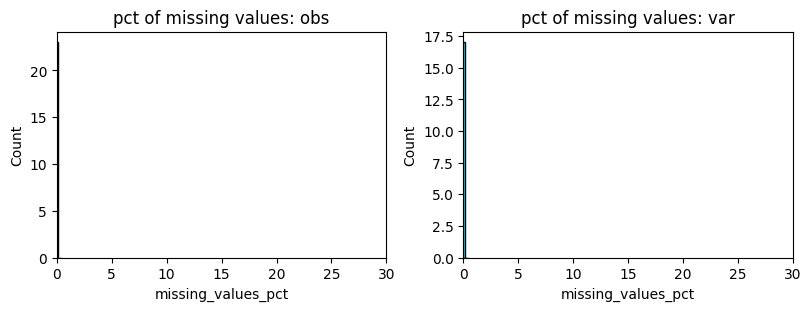

In [70]:
axd = plt.figure(constrained_layout=True, figsize=(8, 3), dpi=100).subplot_mosaic(
    """
    AB
    """
)

sns.histplot(adata.obs["missing_values_pct"], ax=axd["A"], bins=5, color="#54C285").set(
    title="pct of missing values: obs", xlim=(0, 30)
)
sns.histplot(adata.var["missing_values_pct"], ax=axd["B"], bins=5, color="#1FA6C9").set(
    title="pct of missing values: var", xlim=(0, 30)
)

[Text(0.5, 1.0, 'maximum values')]

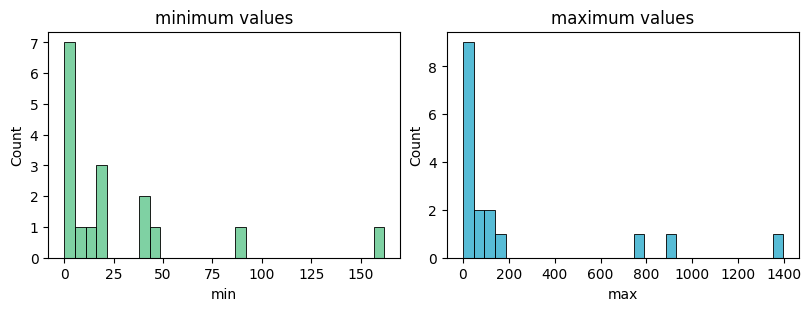

In [71]:
axd = plt.figure(constrained_layout=True, figsize=(8, 3), dpi=100).subplot_mosaic(
    """
    AB
    """
)

sns.histplot(adata.var["min"], ax=axd["A"], bins=30, color="#54C285").set(
    title="minimum values"
)
sns.histplot(adata.var["max"], ax=axd["B"], bins=30, color="#1FA6C9").set(
    title="maximum values"
)

In [72]:
adata.var["coefficient.variation"] = (
    adata.var["standard_deviation"] / adata.var["mean"]
) * 100

In [73]:
adata.var.loc[(adata.var["coefficient.variation"] > 50) & (adata.var["mean"] > 50),]

,missing_values_abs,missing_values_pct,mean,median,standard_deviation,min,max,iqr_outliers,feature_type,coefficient.variation
20,0,0.0,413.491048,367.399994,428.221498,21.0,1396.0,True,numeric,103.562459
21,0,0.0,203.949457,177.800003,176.921168,42.0,919.0,True,numeric,86.747555


In [74]:
ep.pp.log_norm(adata, vars=["20", "21"], offset=1)

AnnData object with n_obs × n_vars = 23 × 17
    obs: 'pT_status', 'pN_status', 'G_status', 'L_status', 'V_status', 'Pn_status', 'R_status', 'M_status_postop', 'Status_OS_dead', 'PFS_sum_03.07.2023', 'PFS_sum_12.02.2018', 'PFS_sum_13.06.2022', 'PFS_sum_18.10.2022', 'PFS_sum_21.05.2021', 'PFS_sum_24.05.2021', 'PFS_sum_24.05.2023', 'PFS_sum_28.04.2023', 'PFS_sum_29.08.2023', 'PFS_sum_30.07.2018', 'PFS_sum_Data still not available (OP< 6 months)', 'PFS_sum_Periop. Tod', 'Status_PFS_recurrence', 'sex_male', 'Weight_loss_>10%_6months_before_OP_Yes', 'DM_Yes', 'DM_yes', 'Long_term_steroid_medication_Yes', 'CEA (ng/ml)_1.95', 'CEA (ng/ml)_10.53', 'CEA (ng/ml)_2.2', 'CEA (ng/ml)_2.8', 'CEA (ng/ml)_5', 'CEA (ng/ml)_6.45', 'CEA (ng/ml)_8.27', 'CEA (ng/ml)_<1,80', 'Localisation_Cauda', 'Localisation_Corpus', 'Abdominal pain_No', 'icterus_No', 'new_onset_DM_No', 'OP_technique_Traverso-Longmire OP', 'OP_technique_total pancreatectomy', 'Resection_liver_met_intraop_No', 'Clavien-Dindo_grade 1', 'Cla

In [75]:
ep.pp.qc_metrics(adata)

(    missing_values_abs  missing_values_pct
 0                    0                 0.0
 1                    0                 0.0
 2                    0                 0.0
 3                    0                 0.0
 4                    0                 0.0
 5                    0                 0.0
 6                    0                 0.0
 7                    0                 0.0
 8                    0                 0.0
 9                    0                 0.0
 10                   0                 0.0
 11                   0                 0.0
 12                   0                 0.0
 13                   0                 0.0
 14                   0                 0.0
 15                   0                 0.0
 16                   0                 0.0
 17                   0                 0.0
 18                   0                 0.0
 19                   0                 0.0
 20                   0                 0.0
 21                   0         

In [76]:
adata.var["coefficient.variation"] = (
    adata.var["standard_deviation"] / adata.var["mean"]
) * 100
adata.var.loc[(adata.var["coefficient.variation"] > 50) & (adata.var["mean"] > 50),]

,missing_values_abs,missing_values_pct,mean,median,standard_deviation,min,max,iqr_outliers,feature_type,coefficient.variation


In [77]:
ep.pp.neighbors(adata, n_pcs=10)

In [79]:
ep.tl.umap(adata)

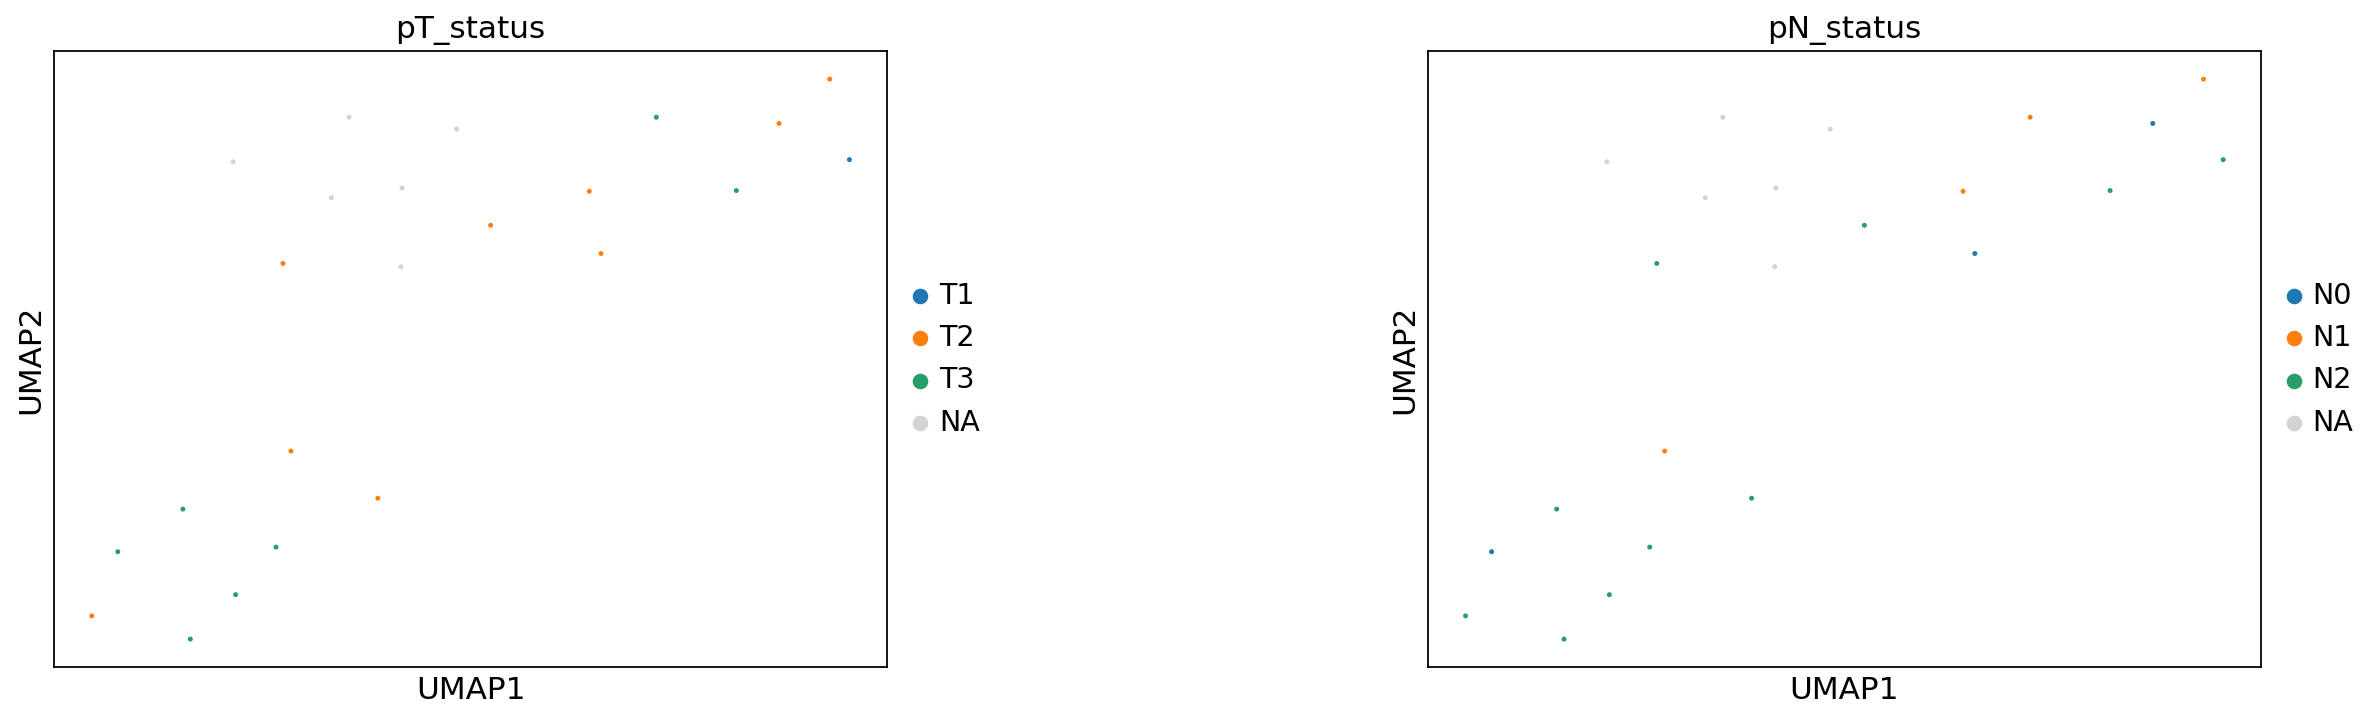

In [81]:
ep.settings.set_figure_params(figsize=(6, 5))
ep.pl.umap(
    adata,
    color=[
        "pT_status",
        "pN_status",
    ],
    wspace=0.5,
    size=20,
    title=["pT_status", "pN_status"],
)